In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random as rand
import math

# Language, Decisions, and How it Can All Be Modeled
*Proposed by DeVante Ellis Brown*

**What is the Experiment?**

One of the key features of humans that has allowed us develop and thrive as we have is our ability to communicate. We can create language and develop it at such an early part of our lifespan. We can create sentences that make complete sense and sentences that have no actual meaning and identify which is which, regardless of whether or not we know why. In English, our vocabulary is incredibly expansive and we can create meaning of the each piece of our vocabulary. Surely there must be some way that our vocabulary is organized so that we can judge what information has similar meaning to other information. In 2016, Huth performed an experiment to research just that. With the data collected they were able to produce a map that represents semantic similarity. For further information on this experiment, please see http://gallantlab.org/index.php/publications/huth-et-al-2016/

When producing language, we have to think about what word would be most appropriate to follow the one we are currently using. This process happens so quickly that we do not really think about the fact that this is a form of decision making. In the case of language production from machines, how does a machine necessarily know what words are more appropriate to use than others. Features such is predictive text exist but are limited to words or phrases before the sentences produced stop making any sense. If the results of the Huth experiment are accurate, one should in theory use this semantic map as a model for language production and even use machines to make valid predictions about future words. We will analyze this data and use it in an attempt to produce language and make decisions/predictions about language in a way that accurately models how we make decisions.

**How was data gathered?**

In the Huth experiement, 5 subjects were tasked with listening to stories from *The Moth Radio Hour* while their bold signals were recorded using an fMRI machine. These recordings were then converted into voxels representing the features of articulation, semantics and spectral features. The semantic features are then mapped into a principal component space, intended to  use the distances as a representation of semantic similarity/difference. 

**Using fMRI**

Why might those who were collecting data choose to use fMRI? The goal of this experiment was to accurately record the changes in neurological activity as subjects listen to the story so that the different features of language could be mapped.  To receive decent measurements, you would want something that is more spatially optimal. This would mean that EEG would be out of the question, as the spatial resolution of EEG is not great, not to mention the amount of noise that comes with using electricity for measurements. While MEG is spatially and temporally good, it is very expensive. Another obstacle is that it is inherently 2-Dimensional, making it difficult to gain a full grasp of the changes in the images. fMRI is has great spatial resolution, but unfortunately has sub-optimal temporal resolution. This is because of what fMRI actually measures. fMRI measures the BOLD signals in the brain as a result of the bloodflow required for certain areas to perform actions. While this means that the measurements will not necessarily be indicative of neural activity, we know that there was activity in that area that required bloodflow.

# How is a Decision Made?

**Humans**

Humans are able make a decisions in a process that is summarized in about 4 steps<sup>3</sup>:

1. Identifying internal states, external states and courses of action.
2. Different potential states must be assigned a value such that they may be compared.
3. Select an optional state after comparing the values for each possible state
4. Analyze the results of the selection to decide whether or not this would make for an appropriate selection in future scenarios and revalue the selection.

# Language Production

Say we were to have some kind of list of words, we will start off simple and expand this to a larger scale.

In [17]:
words = ['brown','dog','fox','jumped','lazy','over','the']

Now we will try to generate sentences from this word bank at random 5 times, and see how many of them actually make sense:

In [18]:
def makeSen(w):
    sentences = 5
    while sentences > 0:
        sentence = ""
        wordcount = rand.randint(4,9)
        while wordcount > 0:
            sentence += rand.choice(words)+" "
            wordcount -= 1
        
        sentence += "."
        print(sentence)
        sentences -= 1  
    return

In [19]:
makeSen(words)

brown jumped dog brown fox fox lazy .
dog brown brown brown brown jumped brown .
fox jumped over the lazy lazy dog jumped brown .
over over jumped brown dog jumped the over over .
dog brown dog jumped the over dog fox the .


Unless you were incredibly lucky, it is likely that sentence actually made much sense. This is because language generally has a set of rules that we must take into consideration as we choose which words we place in parts of the sentence. This is "syntax". It has become so normalized in everyday speech and language production, yet it is still a system of decision making that takes place whenever we speak or write.

How can a machine replicate these rules that seem so innate in our every day usage? Just creating words isn't sufficient enough and replicating sentences that are already valid doesn't really qualify for being able to *produce* language, so something has to be done. A structure must be made that is both valid and flexible, so our production of language isn't heavily limited. This will move the direction towards the system known as Markov chains.

**What is a markov chain, and why?**

Markov chains are a system of probabilistic events following one after another where there are numerous possibilities for the next event and the possibilities of each occurring are a result of the current state. Thus each event following the first is a dependent event, and are selected randomly.

We can use this for language because one thing that is rather interesting about the English language is that the rules of English are somewhat flexible in what kinds of words/parts of speech follow another. For example, a noun could be followed by a verb or an adverb, but if it is an adverb, it is very likely that will be followed by a verb. Depending on which value gets randomly selected, you can create differing kinds of sentences. This type of logic is also applicable to words, but for the sake of the Huth experiment it would not actually prove useful to use markov modeling for words.

To begin, we should organize parts of speech, and words for each of those parts of speech. (Note that we are using a dictionary to store the parts of speech for calling them later with ease)

In [20]:
nouns = ['fox', 'dog']
dets = ['the']
verbs = ['jumped']
adverbs = ['high', 'excitedly']
adjs = ['quick','brown','lazy']
preps = ['over']
parts = {0:nouns, 1:dets, 2:adjs, 3:verbs, 4:adverbs, 5:preps}
partvals = [0,1,2,3,4,5]

Next, the parts of speech must be categorized in a way that expresses the relationship between one another. The easiest way to do this is by assigning probabilities to each of the parts of speech expressing the likelihood of that part of speech following the current one. Fortunately, English has a very select set of rules for proper syntax that we will be basing some of our values for these relationships on.<sup>1</sup>

<img src="syntaxrules.png" alt="Syntax Rules" width="400px"/>

In [21]:
partsProbs = np.array([
    [.05,0,.2,.45,.1,.2],
    [.99,0,0,0,.01,0],
    [.99,0,0,0,.01,0],
    [.33,0,0,0,.33,.34],
    [0,0,0,.8,0,.2],
    [.5,.5,0,0,0,0]
])

Now we will perform a similar action as the sentence above, but instead of using random words we will be using a markov chain to apply syntax rules to the words.

In [22]:
def markovSen():
    sentences = 5
    while sentences > 0:
        sentence = ""
        wordcount = rand.randint(3,8)
        current = rand.randint(0,1)
        while wordcount > 0:
            sentence += rand.choice(parts[current]) + " "
            wordcount -= 1
            current = np.random.choice(partvals, p = partsProbs[current])
        print(sentence)
        sentences -= 1

In [23]:
markovSen()

the dog over fox dog brown fox 
the fox high over the fox fox 
dog jumped excitedly over the fox jumped high 
the dog brown fox jumped 
the dog quick dog jumped over fox 


These results are not necessarily the best, but still an improvement upon just choosing random words. The sentences made should closely resemble sentences that might qualify as valid English sentences.

One limitation of this analysis is that we are using a word bank that is incredibly limited, so words are likely to repeat and the sentence will become less meaningful the longer it is. One solution we could do for this is to increase the vocabulary available to the program so there is less likelihood of repetition and lack of meaning.

In [24]:
nouns = ['fox', 'dog','cat','rabbit','tree','car','man','child','burglar']
dets = ['the','a']
verbs = ['jumped','ran','crawled','walked','bit','crushed']
adverbs = ['high', 'excitedly','quietly','loudly']
adjs = ['quick','brown','lazy','heavy','light','soft','angry']
preps = ['over','on','with','at','under']
parts = {0:nouns, 1:dets, 2:adjs, 3:verbs, 4:adverbs, 5:preps}
partvals = [0,1,2,3,4,5]

In [25]:
markovSen()

a child ran over a 
dog fox under the fox ran 
the rabbit lazy rabbit jumped under cat 
fox quick man angry burglar 
child bit tree 


These "sentences" are starting to look unique and have meaning. But the reality of the matter is that not all words fit well with one another. Beyond the level of syntax in the English language, there comes the actual meaning of words. There are some words that do not have meaning with one another. But how does the brain appropriately categorize these words? Is it possible to  categorize language so well that one can make predictions about upcoming words before they even occur? 

In 2016, a study by Huth involved allowing patients to listen to a story and analyses of their brain activity as they heard certain words was recorded. This was then mapped onto a PC space as shown below.<sup>2</sup>



<img src="semanticmap.jpg" alt="Semantic Map" width="600px"/>

In [26]:
adverbs = ['half','faster','repeatedly','accidentally','instantly','deeply','immediately','profoundly','halfway']
nouns = ['skin','edges','tops','glove','breast','inch','fingers','ribbons','tongue','wrist',
         'garment','gravity','jackets','pairs','uniforms','stock','colors','lighting','quarter',
        'clouds','stream','deck','sporting','shapes','seconds','nature','pounds','flesh','american','culture',
        'atmosphere','weakness','reaction','human','male','shillings','victim','society','floors',
        'winter','gardens','center','shops','clubhouse','facilities','scenery','summer','minutes',
        'weekend','hotels','visitors','community','school','campus','youth','emotion',
        'hatred','compassion','feelings','children','child','murderer','family','wife','husband',
        'visit','office','weeks','charges','month','year','parents','home','landscape','intervals','layers',
        'variety','blazer','bullet','poison','fielder','drops','breath','thoughts','daughter','meeting','moments',
        'experiences','owner','inch','stripes','fur','sound','bat','cap','hatred','fear','business',
        'evenings','facilities','apartment','color']
verbs = ['tan','poison','explode','kill','protect','wears','cut','colored','creating','pressing','lighting',
        'reach','drops','stock','loses','knew','hit','speak','tells','met','happened','wished','waited','visiting',
        'arrive','meeting','studying','explore','exploring','rumbling','rented','sounded','convinced','hearing',
        'believing','confessed','smooth','quiet','convicted','paused','purchased','sporting','fear',
        'swallow','listening','talked','arrested']
adjs = ['thicker','thin','thinner','metallic','colored','soft','smooth','pure','white','delicate','faster',
       'medium','wide','deeper','expressive','intricate','solid','subtle','lethal','slow','double','natural',
       'sporting','american','cruel','paused','convicted','convinced','anxious','spacious','harsh','vile','male',
       'calm','annual','profound','community','diverse','purchased','married','four','five','awake','exploring',
       'top','rented','pressing','rumbling','winter','summer','weak','religious','uneasy','striped','tan','heavier','each',
       'human','intense','half','arrested']
dets = ['a','the']
preps = ['with','over','at','on','beside','under','from']

*(Whew)* there were a lot of words here and many of them fall under several different parts of speech depending on the context. This could possibly prove to be a problem moving forward but for now we will see how well our current markiv chain system handles the new word bank.

In [27]:
parts = {0:nouns, 1:dets, 2:adjs, 3:verbs, 4:adverbs, 5:preps}
partvals = [0,1,2,3,4,5]
markovSen()

the culture beside the layers paused half hearing 
stock hit at seconds 
the wrist from a charges happened over 
seconds tells from a clouds confessed deeply exploring 
the skin happened over the school kill at 


Again, we are currently just selecting words at random, so we will have to find some other way to create meaningful sentences. The easiest way to do this would be to use their representation on this graph to see what is more likely to follow something else. To do this we will need to plot all of the words onto a kind of graph with numerical indices so that we will be able to call those indices and use them as a form of distance from one another. 

(**Note**: the guidelines were made in photoshop with the aid of the ruler tool but there is no guarantee that these measurements in the dictionary are pixel perfect. Fortunately this should not severely skew the results of the experiment. I've also decided to only work with a 2 dimensional version of graph due to time and space constraints. It would be interesting to remap all of these points in 3 dimensions and see how the results shift.)

<img src="wordsgraphed.png" alt="Semantic Map" width="400px"/>

In [28]:
wordgraph = {'golf':[-6.3,-.5],'annual':[-4.3,-.5],'emotion':[3.1,-.5],'hatred':[5.9,-.5],'innocent':[12.5,-.7],'tops':[-9.9,7.8],
             'weekend':[-3,-9.9],'quiet':[-.4,-9.8],'apartment':[2.3,-10],'talked':[6,-9.7],'parents':[9,-10],
             'met':[7.2,-10.7],'wished':[5,-11.4],'waited':[2,-11.5],'hotel':[-.9,-11.4],'school':[-1,-12],
             'home':[1.2,-12.2],'happened':[7,-12.1],'visiting':[1.5,-13.3],'arrive':[1.1,-13.8],'meeting':[1,-14.2],'visit':[3,-14.8],
             'thoughts':[2.2,-4.8],'feelings':[6.2,-4.9],'refused':[10,-4.9],'married':[10,-5.3],'daughter':[11,-5.8],
             'hearing':[6,-5.8],'teaching':[-3,-5.6],'year':[.8,-5.9],'community':[-2,-5.6],'exploring':[-5.9,-5.2],
             'hotels':[-7,-6],'explore':[-4.8,-6.2],'month':[1.8,-6.3],'speak':[6.5,-6.5],'family':[8.5,-6.2],
             'arrested':[11.6,-6.3],'confessed':[11.6,-6.9],'tells':[8.5,-7.5],'immediately':[5.5,-7.3],'paused':[2.1,-6.7],
             'moments':[-1.5,-6.5],'week':[-1.3,-6.8],'visitors':[-6.5,-6.7],'evenings':[-7.5,-7.1],'shopping':[-3.5,-7.1],
             'weeks':[1.7,-7.3],'hour':[-5.1,-7.7],'experiences':[.6,-7.7],'uneasy':[5,-7.6],'convinced':[9.7,-7.8],
             'father':[12.2,-8],'whom':[10,-8.2],'knew':[7.9,-8.1],'months':[3,-8.1],'awake':[-.8,-8.1],
             'reading':[-3,-8.1],'campus':[-5.7,-8],'hours':[-4.2,-8.8],'studying':[-1.6,-8.7],'realised':[2,-8.7],
             'anxious':[4.6,-8.5],'wife':[11.1,-8.6],'husband':[10.5,-9.1],'office':[2.1,-9.4],'rented':[-1.1,-9.4],
             'believes':[10,-1],'deeply':[3.8,-1.1],'five':[-2.1,-.7],'four':[-3.9,-1],'gardens':[-6,-1],'winter':[-8,-.7],
             'center':[-9,-1.6],'shops':[-7.2,-1.7],'ten':[-1.8,-1.2],'compassion':[7,-1.5],'murder':[12.4,-1.7],'charges':[10.1,-2.1],
             'banker':[5,-2],'youth':[1.3,-2],'twice':[.7,-1.7],'purchased':[-2.6,-1.8],'scenery':[-10.5,-2.1],'each':[-4.6,-2.2],
             'profound':[-2.5,-2.2],'anger':[7,-2.4],'convicted':[11.5,-2.7],'believing':[9,-3.5],'fear':[6.9,-3.2],'owner':[5,-3],
             'spiritual':[2,-3],'pause':[-.5,-2.8],'minutes':[-4,-2.9],'spacious':[-7.5,-2.6],'summer':[-7,-3],'facilities':[-7.5,-3.7],
             'clubhouse':[-4.2,-3.6],'listening':[-.6,-3.5],'sounded':[2.4,-3.7],'child':[12.5,-3.7],'murderer':[12.2,-4.2],'children':[9.3,-4.2],
             'religious':[6.2,-4.1],'calm':[.6,-4],'profoundly':[-2,-4.1],'rumbling':[-5.4,-4.1],'halfway':[-5.2,-4.5],'dreaming':[-2.2,-5.1],
             'business':[.7,-5],'glove':[-.71,9.2],'fur':[-2.6,10.3],'stripes':[-4,10.3],'inch':[-6.2,10.3],'edges':[-9.5,9.4],'color':[-6.9,9.9],
             'smooth':[-9.4,10.9],'soft':[-7,11.2],'cap':[-5.8,10.8],'blade':[-3.2,10.9],'breast':[2.1,10.4],'colored':[-5.8,11.7],
             'skin':[-1,12],'thinner':[-4.1,12.3],'metallic':[-5.7,12.2],'thin':[-5.8,12.9],'thicker':[-7.1,13.5],'layers':[-9.5,10.3],
             'nature':[0,1.2],'instantly':[1.5,0],'society':[5,-.1],'victim':[0,13],'environment':[-3.5,.1],'floors':[-8.5,-.1],
             'cruel':[8.5,.35],'shillings':[1.2,.6],'half':[-3.7,.4],'sports':[-5.6,.5],'landscape':[-8.5,.7],'atmosphere':[-9.6,1.2],
             'quarter':[-5.6,1.3],'seconds':[-2.8,1.1],'harsh':[2.1,1.2],'repeatedly':[6.5,1.9],'kill':[9.1,1.1],'accidentally':[5.4,1.3],
             'intense':[-3,1.3],'slow':[-5.2,1.7],'clouds':[-9.6,1.8],'stream':[-10,2.4],'deck':[-7.5,2.2],'sporting':[-4.1,2.3],
             'breath':[-1.8,2],'hit':[1.2,1.9],'reaction':[3.1,2.1],'loses':[6.1,2.2],'evil':[6.9,2.6],'weakness':[4.2,2.7],
             'culture':[.2,2.5],'sound':[-2.4,2.8],'deeper':[-5.1,3.2],'diverse':[-6.7,2.8],'intervals':[-9,3],'lighting':[-10,3.9],
             'reach':[-7.5,3.5],'uniforms':[-4,4.5],'stock':[-1.8,3.5],'american':[1.4,3.3],'vile':[5.2,3.7],'male':[7,3.2],
             'protect':[7.4,3.9],'human':[5.1,4.2],'explode':[1,4],'pressing':[-2,4.2],'faster':[-6,4.1],'jackets':[-8,4.6],
             'pairs':[-5.1,4.6],'double':[-2.9,4.6],'fielder':[1,4.6],'bat':[3.2,5.5],'weak':[1.8,5.3],'drops':[-3.8,5.1],
             'gravity':[-5.9,5.2],'top':[-7.7,5.4],'intricate':[-9.6,5.9],'upwards':[-6.7,6],'blazer':[-4,6.2],'clothing':[-2,5.6],
             'pounds':[-.9,6.2],'poison':[3.6,6.1],'lethal':[4.9,6.9],'bullet':[2.4,6.7],'swallow':[-.2,6.8],'natural':[-3.1,6.6],
             'variety':[-7.2,6.7],'wide':[-9.9,7],'creating':[-6,7.1],'garment':[-1.9,7.2],'wrist':[.9,7.3],'expressive':[.9,7.8],
             'pure':[-2.8,8.1],'heavier':[-6,8.1],'solid':[-9.3,8.5],'colors':[-7.6,8.8],'striped':[-5,8.9],'tan':[-4,8.2],
             'white':[-2.2,8.6],'tongue':[0,8.5],'subtle':[.9,8.8],'fingers':[-1.9,9.2],'ribbons':[-4.6,9.3],'medium':[-8.1,9.5],
             'shapes':[-9,9.2],'medium':[-8.1,9.5],'delicate':[-3,9.8],'cut':[-1.1,9.7],'wears':[1.2,9.5],'flesh':[1,10]}

That was a lot of plotting! But now we can make a distance equation that will take in two separate sets of coordinates as lists and measure the distance using the formula **sqrt((x<sub>1</sub> - x<sub>2</sub>)<sup>2</sup> + (y<sub>1</sub> - y<sub>2</sub>)<sup>2</sup> )**

In [29]:
def distance(l1, l2):
    xdist = l1[0] - l2[0]
    ydist = l1[1] - l2[1]
    val = xdist*xdist + ydist*ydist
    return math.sqrt(val)

And with that we should be able to calculate the distance of any words from the semantic map. Lets test it on two of the map's most far apart words: thicker and visit and two very close words: met and happened.

In [30]:
distance(wordgraph['thicker'], wordgraph['visit'])

30.048294460751013

In [31]:
distance(wordgraph['met'], wordgraph['happened'])

1.4142135623730956

In [32]:
list.sort(verbs, key = lambda x: distance(wordgraph['arrive'], wordgraph[x]))

In [33]:
def semSen():
    sentences = 5
    while sentences > 0:
        sentence = "The "
        wordcount = rand.randint(3,7)
        nextpart = 0
        current = rand.choice(nouns)
        while wordcount > 0:
            sentence += current + " "
            wordcount -= 1
            nextpart = np.random.choice(partvals, p = partsProbs[nextpart])
            if nextpart == 1 or nextpart == 5:
                sentence += rand.choice(parts[nextpart]) + " "
                nextpart = np.random.choice(partvals, p = partsProbs[nextpart])
            else:
                currpart = parts[nextpart]
                list.sort(currpart, key = lambda x: distance(wordgraph[current], wordgraph[x]))
                current = rand.choice(currpart[0:4])
        sentence += "."
        print(sentence)
        sentences -= 1    

In [34]:
semSen()

The facilities summer summer .
The hotels rumbling summer over .
The month paused weeks rented at .
The fur colored inch under inch inch .
The lighting with lighting lighting sporting instantly .


In the line `current = rand.choice(currpart[0:4])` we are picking the top 4 closest words for that given part of speech. Why would we do this instead of just picking the first closest choice which would in theory be the most semantically similar according to this study? Due to some words falling into several parts of speech, it is likely that you may wind up in a loop of the same word throughout a sentence, because that word is semantically closer than any other word could possibly be. So this method will decrease the likelihood of getting stuck in a loop.

Unfortunately, even with this method of word selection, it appears that consistently creating actual meaningful sentences. Does this mean that the Huth experiment's data is insufficient for modeling language production in a way that is semantically meaningful? No this isn't necessarily the case. Our graph was only represented on 2 dimensions while there were actually 3 dimensions in the Huth experiment, which could have contributed to some changes in behavior. Similarly, language is very complicated and there are a lot more words than the ones used in the Huth experiment, and English has many rules that this system did not necessarily implement completely or correctly. Can we say that this model for language production effectively reflects human decision making? It appears that steps 1-3 above are met sufficiently, with the outside environment being the noun that is randomly generated in the beginning of the sentence. The only step that requires attention is step 4, altering values for future reference. We understand the values in this model to be the distance between the words. For a value to change under this model would mean that it is moved closer in proximity (and thus in meaning) to a different word. To do this, we should first look at how the data appears on a graph before adjustments.

In [35]:
data = np.array([wordgraph[x] for x in wordgraph])

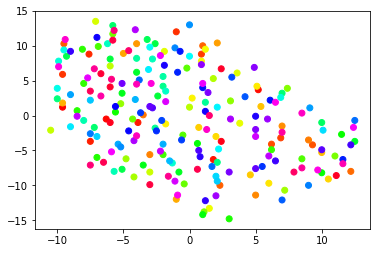

In [36]:
fig, axis = plt.subplots()
cmap = plt.get_cmap('hsv')
colors = cmap(np.linspace(0, 1, len(wordgraph)))
axis.scatter(data[:,0], data[:,1], c=colors)

No we will write an algorithm that adjusts a word's position on the graph depending on whether or not it was chosen to be the following word, and incorporate it into a new sentence production function.

In [37]:
def med(l1, l2):
    half = 2
    xmid = (wordgraph[l2][0] - wordgraph[l1][0]) / float(half)
    ymid = (wordgraph[l2][1] - wordgraph[l1][1]) / float(half)
    xmed = wordgraph[l1][0] + xmid
    ymed = wordgraph[l1][1] + ymid
    return [xmed, ymed]
def adjSen(num):
    while num > 0:
        sentence = "The "
        wordcount = rand.randint(3,7)
        nextpart = 0
        current = rand.choice(nouns)
        while wordcount > 0:
            sentence += current + " "
            wordcount -= 1
            nextpart = np.random.choice(partvals, p = partsProbs[nextpart])
            if nextpart == 1 or nextpart == 5:
                sentence += rand.choice(parts[nextpart]) + " "
                nextpart = np.random.choice(partvals, p = partsProbs[nextpart])
            else:
                currpart = parts[nextpart]
                list.sort(currpart, key = lambda x: distance(wordgraph[current], wordgraph[x]))
                nxt = rand.choice(currpart[0:4])
                first = currpart[1]
                wordgraph[nxt] = med(current,nxt)
                current = nxt
        sentence += "."
        num -= 1    

Now, we will generate 1000 sentences and see how the graph has changed from the one above!

In [38]:
adjSen(1000)

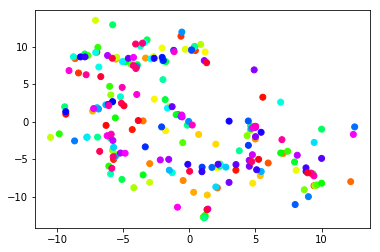

In [39]:
data = np.array([wordgraph[x] for x in wordgraph])
fig, axis = plt.subplots()
cmap = plt.get_cmap('hsv')
colors = cmap(np.linspace(0, 1, len(wordgraph)))
axis.scatter(data[:,0], data[:,1], c=colors)

**What happened?**

While assigning labels to each of these points is rather difficult, we can see that the words made an interesting shift from the original graph. The points were relatively well spread in the initial graph, but after making so many adjustments to account for revaluation of results, the words became more clustered with one another in different groups depending on which words get chosen for use and revaluation. This is because the means for revaluing chosen words entailed moving the chosen word closer to the word before so it will be more likely to be chosen in the future. This is similar to how some phones will adjust their predictive text accordingly depending on how we as humans decide which word  is more appropriate to use. While I cannot say forsure that this reflects how humans revalue their word usage, it does provide a rather interesting result of this particular method of revaluation.

# Things that Could Have Been Done Better

Here I will discuss some of the things that I would or should have changed for this research and how that may or may not have affected the results.

**My Usage of the PCA graphs**

About halfway through graphing the words I realized that the two PCA graphs were to be read as a means of graphing the words on a 3 dimensional plane. Due to time/size concerns I opted to work with the words as they were represented on the left graph of the Huth results. I believe that the overall concept of this model does not significantly change with this added dimension. What this dimension *does* change is how far apart some of the words are. By ignoring the depth distance between the words, there may or may not be distances not taken into account. This could skew some of "most similar" that are calculated, possibly making sentences that make more or less sense. If I have time to readdress this in the future I will be sure to correct it.

**Syntax Rules & Parts of Speech**

One tricky part about producing language from something that has not inherently learned that language is that the syntax rules can get rather complicated. Within the Parts of Speech I suppose it would have been more appropriate to categorize them for different rules and actually categorize the words within the different kinds of verb phrases (V<sub>1</sub>,V<sub>2</sub>, etc.) This didn't actually affect the process of decision making that we modeled but rather the results of trying to generate sentences. Allowing for a more structured categorization and production of words to conform to the rules of English syntax probably would have resulted in better sentences while still utilizing the markov model.

**Valuation Systems and Negative Responses**

One thing that proved rather challenging with this model was being able to show what happens when a chosen value does not provide a desirable result. In this model all of the results are considered "optimal" thus points are always moving closer. If we were to receive a negative response, it would not be difficult to move the point further away from the previous word. The difficulty would be deciding whether or not a chosen word provided a desirable result. One solution would be to do so at random, but for the sake of trying to produce meaningful language, it seems more ideal to adjust the graph in a way such that words that are semantically more similar are less likely to appear in the future. 

# Concluding Thoughts

Language is very complicated. Some langauges have ambiguous meanings and words can be represented as several different parts of speech. Overall it is not safe to say that *this* implementation is sufficient for creating consistent meaningful language. There are issues addressed above that, if implemented properly, would probably make greater strides in this goal. What we *can* conclude is that we were able to successfully model language production as a form of decision making using Huth's data. By using distance as a form of valuation we were able to pick more optimal word choices and adjust the initial semantic map accordingly. It would be interesting to see if one could be trained to use different words to follow words already in their vernacular and see if/how their semantic map would change as a result. Huth's data has opened the doors for a whole new world of understanding language and there is a lot of room for improvement in just this analysis. Future implementations of Natural Langauge Processing could benefit from data like this and creating a similar valuation system.

## References 

<sup>1</sup> http://englishgrammarwallpaper.blogspot.com/2012/10/english-grammar-rules.html

<sup>2</sup> http://gallantlab.org/index.php/publications/huth-et-al-2016/

<sup>3</sup> Rangel, A. *A framework for studying the neurobiology of value-based decision making*